# Analysis and Informal Plotting of Mouse Tracking Data

Before doing any of the Python snippets below, must first use `process.py` to parse raw data and generate a number of data files: 
- `processed.csv`, which contains the summary statistics
- `nx.csv`, `ny.csv`, `rx.csv`, and `rx.csv`, which contain the actual processed mouse trajectorie




In [1]:
import os 
import glob

import numpy as np # Numeric calculation
import pandas as pd # General purpose data analysis library
import squeak # For mouse data

# For plotting
import matplotlib.pyplot as plt 
%matplotlib inline
# Prettier default settings for plots (optional)
import seaborn
seaborn.set_style('white')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('processed.csv') # import data from preprocessed CSV files
nx = pd.read_csv('nx.csv')
ny = pd.read_csv('ny.csv')
rx = pd.read_csv('rx.csv')
ry = pd.read_csv('ry.csv')

In [3]:
dataCorrect=data.loc[data['accuracy']==1] # include only correct trials


In [4]:
dataCorrect.rt=dataCorrect['rt'].astype(float) # convert some RTs to floats (not sure why this is occurring)  ignore the error that it throws
float(len(dataCorrect))/float(len(data)) # accuracy

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.9519318181818182

After subsetting on the correct trials, we can use the '.groupby()' function in Python to generate tables of means and SDs

In [5]:
# tables of means (USE THIS!!!)
print dataCorrect.groupby(['congruity'])['rt','init_time'].mean()

                      rt   init_time
congruity                           
congruent     897.614541  304.767580
incongruent  1001.976805  320.813008


In [6]:
# tables of Standard Deviations (DON'T USE THIS!!!)
print dataCorrect.groupby(['congruity'])['rt','init_time'].std()

                     rt   init_time
congruity                          
congruent    228.170545  126.795214
incongruent  270.100738  143.572850


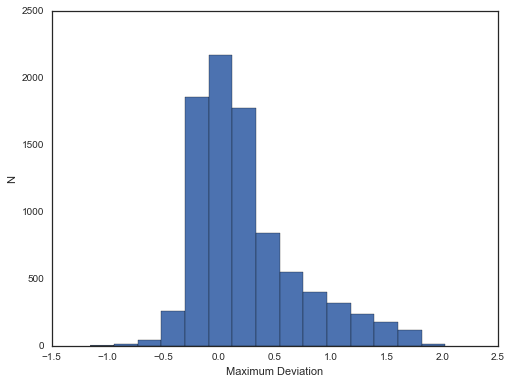

In [7]:
plt.hist(data.md, bins=15)
plt.xlabel("Maximum Deviation")
plt.ylabel("N")
plt.show()

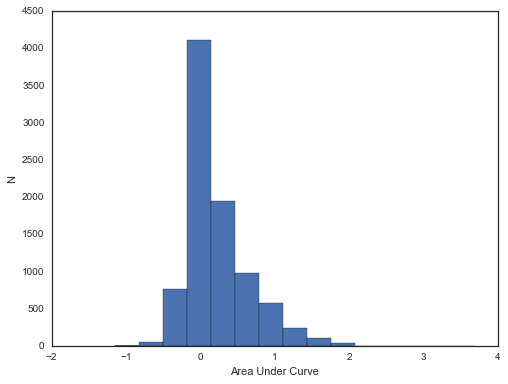

In [8]:
plt.hist(data.auc, bins=15)
plt.xlabel("Area Under Curve")
plt.ylabel("N")
plt.show()

In [9]:
print dataCorrect.groupby(['congruity'])['md','auc','xflips'].mean()

                   md       auc    xflips
congruity                                
congruent    0.088941  0.087379  0.079142
incongruent  0.405120  0.339755  0.246055


In [10]:
print dataCorrect.groupby(['congruity'])['md','auc','xflips'].std()

                   md       auc    xflips
congruity                                
congruent    0.368604  0.350239  0.326732
incongruent  0.508819  0.447463  0.543670


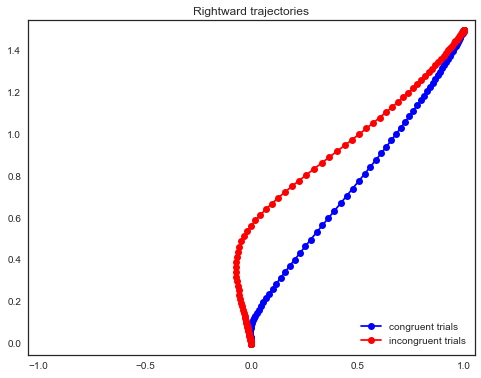

In [11]:
# Plot average *rightward* trajectories by congruity
dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials


congruentRight_indices = dataRight[dataRight.congruity=='congruent'].index
incongruentRight_indices = dataRight[dataRight.congruity=='incongruent'].index

congruentRightX = nx.iloc[congruentRight_indices].mean()
congruentRightY = ny.iloc[congruentRight_indices].mean()

incongruentRightX = nx.iloc[incongruentRight_indices].mean()
incongruentRightY = ny.iloc[incongruentRight_indices].mean()



plt.plot(congruentRightX, congruentRightY, '-o', color='blue', label='congruent trials')
plt.plot(incongruentRightX, incongruentRightY, '-o', color='red', label='incongruent trials')
plt.legend(loc="lower right")
plt.title("Rightward trajectories")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

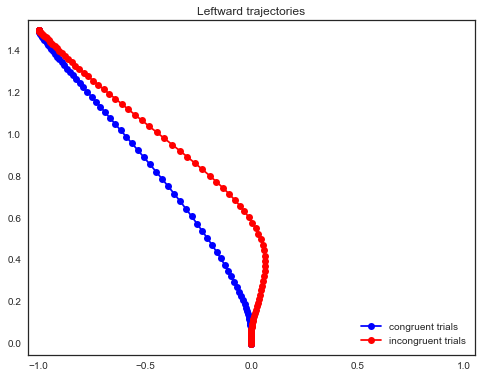

In [12]:
# Plot average *leftward* trajectories by congruity
dataLeft=dataCorrect.loc[dataCorrect['response']==1] # plot ALL trials


congruentLeft_indices = dataLeft[dataLeft.congruity=='congruent'].index
incongruentLeft_indices = dataLeft[dataLeft.congruity=='incongruent'].index

congruentLeftX = -nx.iloc[congruentLeft_indices].mean() # reverse trajectories to undo remapping
congruentLeftY = ny.iloc[congruentLeft_indices].mean()

incongruentLeftX = -nx.iloc[incongruentLeft_indices].mean() # reverse trajectories to undo remapping
incongruentLeftY = ny.iloc[incongruentLeft_indices].mean()



plt.plot(congruentLeftX, congruentLeftY, '-o', color='blue', label='congruent trials')
plt.plot(incongruentLeftX, incongruentLeftY, '-o', color='red', label='incongruent trials')
plt.legend(loc="lower right")
plt.title("Leftward trajectories")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()